In [1]:
#importing all neccessary libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

#uploading the dataset
df_url = 'https://raw.githubusercontent.com/AnjuSalyGeorge/Bank_Marketing_ML_model/main/bank-additional-full.csv'
url_content = requests.get(df_url, verify=False).content
bankdata = pd.read_csv(io.StringIO(url_content.decode('utf-8')))
bankdata.head(3).T

,0,1,2
age,56,57,37
job,housemaid,services,services
marital,married,married,married
education,basic.4y,high.school,high.school
default,no,unknown,no
housing,no,no,yes
loan,no,no,no
contact,telephone,telephone,telephone
month,may,may,may
day_of_week,mon,mon,mon


In [2]:
#standardizing column names
new_column_names = {
    'age': 'age',
    'job': 'job',
    'marital': 'marital',
    'education':'education',
    'default':'default',
    'housing':'housing',
    'loan':'loan',
    'contact':'contact',
    'month':'month',
    'day_of_week':'day_of_week',
    'duration':'duration',
    'campaign':'campaign',
    'pdays':'pdays',
    'previous':'previous',
    'poutcome':'poutcome',
    'emp.var.rate':'emp_var_rate',
    'cons.price.idx':'cons_price_idx',
    'cons.conf.idx':'cons_conf_idx',
    'euribor3m':'euribor3m',
    'nr.employed':'nr_employed',
    'y':'term_deposit_subscription'
}
bankdata=bankdata.rename(columns=new_column_names)

In [3]:
bankdata.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed',
       'term_deposit_subscription'],
      dtype='object')

# **Creating a Baseline Model-RF model**-Features using all the numeric

In [4]:
bankdata_BL=bankdata.copy()

In [5]:
bankdata_BL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        41188 non-null  int64  
 1   job                        41188 non-null  object 
 2   marital                    41188 non-null  object 
 3   education                  41188 non-null  object 
 4   default                    41188 non-null  object 
 5   housing                    41188 non-null  object 
 6   loan                       41188 non-null  object 
 7   contact                    41188 non-null  object 
 8   month                      41188 non-null  object 
 9   day_of_week                41188 non-null  object 
 10  duration                   41188 non-null  int64  
 11  campaign                   41188 non-null  int64  
 12  pdays                      41188 non-null  int64  
 13  previous                   41188 non-null  int

In [6]:
bankdata_BL['term_deposit_subscription'] = bankdata_BL['term_deposit_subscription'].map({'no': 0, 'yes': 1})

In [7]:
X = bankdata_BL.select_dtypes(include=np.number).drop('term_deposit_subscription', axis=1)
y=bankdata_BL['term_deposit_subscription']

In [8]:
from sklearn.ensemble import RandomForestClassifier
avg_oob=[]
for i in range(10):
    rf = RandomForestClassifier(n_estimators=100,
                           n_jobs=-1,
                           oob_score=True)          #Instantiate RandomForestRegressor with 100 trees in the forest
    rf.fit(X,y)                                     #Fit the Baseline  model
    oob_score = rf.oob_score_                       #Get the oob score from fitted model
    avg_oob.append(oob_score)
average_oob_score_baseline = np.mean(avg_oob)       #calculate the average oob score over the 10 iterations
print(f"Average OOB Score over 10 runs: {average_oob_score_baseline:.4f}")

Average OOB Score over 10 runs: 0.9110


In [9]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X, y)
print("Score:", rf.score(X, y))

Score: 0.9998057686704865


**The baseline model, using all numeric features, initially shows high accuracy (~99%) before data cleaning and preparation. This high accuracy may be misleading if the dataset is heavily imbalanced, as the model could achieve this by predominantly predicting the majority class. Additionally, the presence of irrelevant or highly correlated features before preprocessing can lead the model to exploit spurious patterns. Duplicated data can further cause the model to memorize training examples instead of learning generalizable patterns, especially if duplicates exist in both the training and testing sets. Therefore, the next steps involve data denoisinng, exploratory data analysis (EDA), and preprocessing to ensure the robustness of the final machine learning models.**

# **Data Cleaning**

In [10]:
bankdata.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [11]:
bankdata.duplicated().sum()

12

In [12]:
# Dropping duplicate rows
bankdata = bankdata.drop_duplicates()
bankdata.duplicated().sum()

0

In [13]:
#Drop unnecessory column contact
bankdata = bankdata.drop('contact', axis=1)

In [14]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        41176 non-null  int64  
 1   job                        41176 non-null  object 
 2   marital                    41176 non-null  object 
 3   education                  41176 non-null  object 
 4   default                    41176 non-null  object 
 5   housing                    41176 non-null  object 
 6   loan                       41176 non-null  object 
 7   month                      41176 non-null  object 
 8   day_of_week                41176 non-null  object 
 9   duration                   41176 non-null  int64  
 10  campaign                   41176 non-null  int64  
 11  pdays                      41176 non-null  int64  
 12  previous                   41176 non-null  int64  
 13  poutcome                   41176 non-null  object 


# **Exploratory Data Analysis (EDA)**

In [15]:
#Encode target variable into 0 and 1
bankdata['term_deposit_subscription'] = bankdata['term_deposit_subscription'].map({'no': 0, 'yes': 1})

### **Find Correlation between Numeric Variables**

[('emp_var_rate', 'euribor3m'), ('emp_var_rate', 'nr_employed'), ('euribor3m', 'nr_employed')]


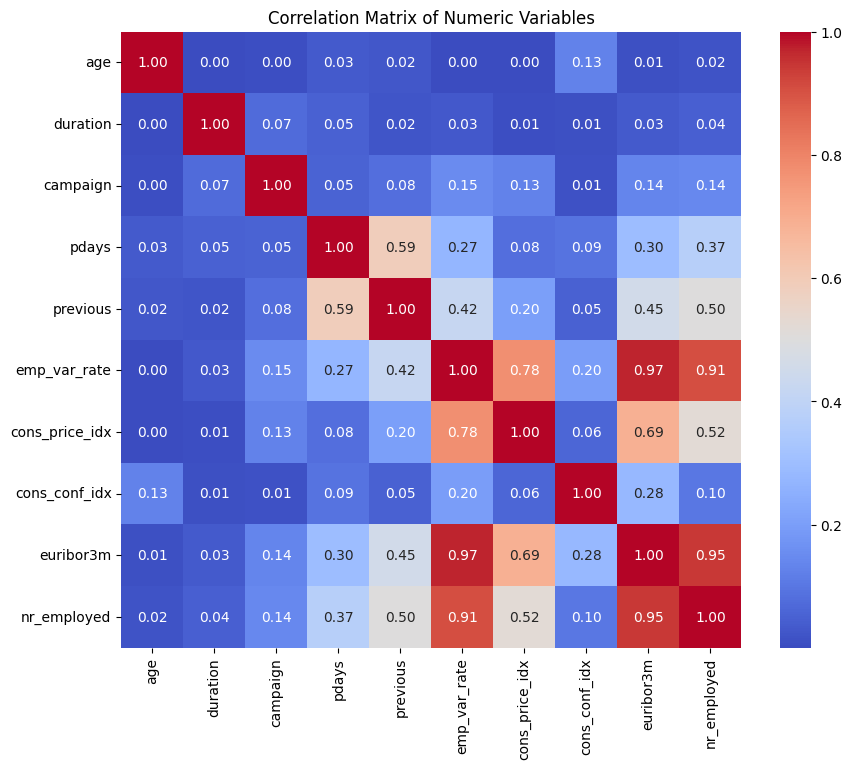

In [16]:
#There is no varibles that have absolute correlation 1 with yhe target variable.
#Check the absolute correlation among features and list pair of variable having corr >0.8

#Import necessory libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate absolute correlations between numeric variables
correlations = bankdata[['age', 'duration', 'campaign', 'pdays', 'previous',
                        'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
                        'euribor3m', 'nr_employed']].corr().abs()

# Find pairs of variables with absolute correlation of 0.8 or more
variables_with_high_corr = []
for i in range(len(correlations.columns)):
    for j in range(i + 1, len(correlations.columns)):
        if correlations.iloc[i, j] >= 0.8:
            variables_with_high_corr.append((correlations.columns[i], correlations.columns[j]))

print(variables_with_high_corr)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

**High correlation (greater than 0.8) between two variables, it indicates multicollinearity.emp_var_rate has a very high correlation with both euribor3m (0.97) and nr_employed (0.91).So we drop the variable emp_var_rate.**

In [17]:
# Drop variable emp_var_rate
bankdata = bankdata.drop('emp_var_rate', axis=1)

### **Chi-Square Test of Independence- Categorical Variables**

Chi-square test for job: p-value = 0.0000
Chi-square test for marital: p-value = 0.0000
Chi-square test for education: p-value = 0.0000
Chi-square test for default: p-value = 0.0000
Chi-square test for housing: p-value = 0.0566
Chi-square test for loan: p-value = 0.5772
Chi-square test for month: p-value = 0.0000
Chi-square test for day_of_week: p-value = 0.0000
Chi-square test for poutcome: p-value = 0.0000

Variables with high p-values (no significant association with target): ['housing', 'loan']


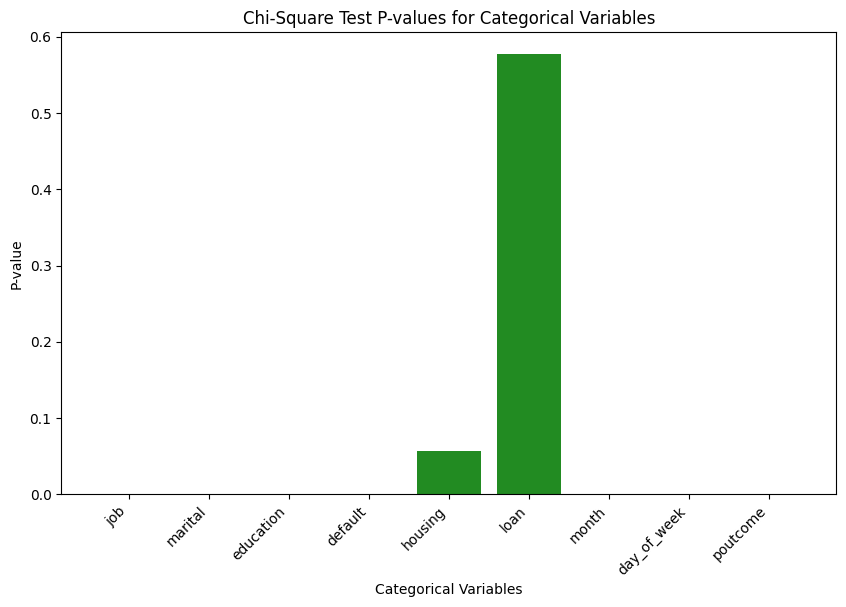

In [18]:
# In Chi-square tests, the p-value indicates whether there is a statistically significant or not

from scipy.stats import chi2_contingency
# List of categorical variables
categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'day_of_week', 'poutcome']

# Perform chi-square test for each categorical variable with the target variable
high_p_value_vars = []
for var in categorical_vars:
    contingency_table = pd.crosstab(bankdata[var], bankdata['term_deposit_subscription'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test for {var}: p-value = {p:.4f}")
    if p > 0.05:  # Check if p-value is greater than 0.05 (indicating no significant association)
        high_p_value_vars.append(var)

print("\nVariables with high p-values (no significant association with target):", high_p_value_vars)

# Plot the p-values
plt.figure(figsize=(10, 6))
plt.bar(categorical_vars,[chi2_contingency(pd.crosstab(bankdata[var], bankdata['term_deposit_subscription']))[1] for var in categorical_vars],color='#228B22')
plt.xlabel('Categorical Variables')
plt.ylabel('P-value')
plt.title('Chi-Square Test P-values for Categorical Variables')
plt.xticks(rotation=45, ha='right')
plt.show()

Chi-square test for job and marital: p-value = 0.0000, Cramer's V = 0.1844
Chi-square test for job and education: p-value = 0.0000, Cramer's V = 0.3598
Chi-square test for job and default: p-value = 0.0000, Cramer's V = 0.1530
Chi-square test for job and housing: p-value = 0.0929, Cramer's V = 0.0195
Chi-square test for job and loan: p-value = 0.1056, Cramer's V = 0.0193
Chi-square test for job and month: p-value = 0.0000, Cramer's V = 0.1110
Chi-square test for job and day_of_week: p-value = 0.0001, Cramer's V = 0.0232
Chi-square test for job and poutcome: p-value = 0.0000, Cramer's V = 0.1009
Chi-square test for marital and education: p-value = 0.0000, Cramer's V = 0.1170
Chi-square test for marital and default: p-value = 0.0000, Cramer's V = 0.0958
Chi-square test for marital and housing: p-value = 0.0449, Cramer's V = 0.0125
Chi-square test for marital and loan: p-value = 0.7656, Cramer's V = 0.0064
Chi-square test for marital and month: p-value = 0.0000, Cramer's V = 0.0522
Chi-sq

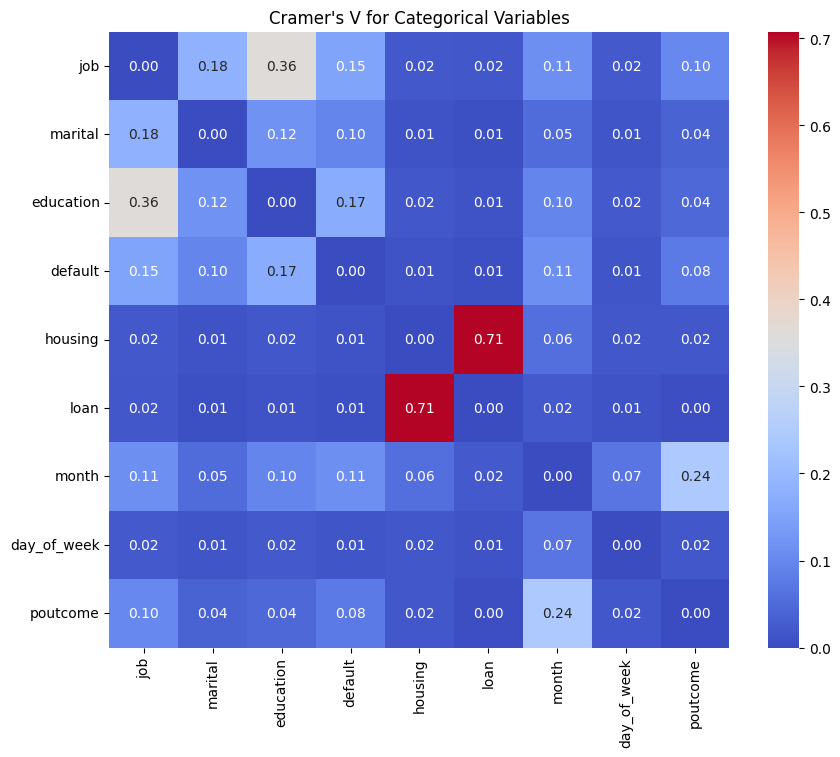


Pairs of variables with high Cramer's V (potential multicollinearity): [('housing', 'loan')]


In [19]:
# Find Cramer's V value amoung Categorical features
#A low Cramer's V value indicates a weak association, even if the p-value is statistically significant

# Initialize a matrix to store Cramer's V values
cramers_v_matrix = np.zeros((len(categorical_vars), len(categorical_vars)))

# Perform chi-square test for each pair of categorical variables
for i in range(len(categorical_vars)):
  for j in range(i + 1, len(categorical_vars)):
    var1 = categorical_vars[i]
    var2 = categorical_vars[j]
    contingency_table = pd.crosstab(bankdata[var1], bankdata[var2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Calculate Cramer's V
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    min_dim = min(contingency_table.shape) - 1
    cramers_v = np.sqrt(phi2 / min_dim)

    # Store Cramer's V in the matrix
    cramers_v_matrix[i, j] = cramers_v
    cramers_v_matrix[j, i] = cramers_v # Make the matrix symmetric
    print(f"Chi-square test for {var1} and {var2}: p-value = {p:.4f}, Cramer's V = {cramers_v:.4f}")

# Create a DataFrame from the Cramer's V matrix
cramers_v_df = pd.DataFrame(cramers_v_matrix, index=categorical_vars, columns=categorical_vars)

# Plot Cramer's V values using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Cramer's V for Categorical Variables")
plt.show()

# Identify variables with high Cramer's V (potential multicollinearity)
high_cramers_v_pairs = []
for i in range(len(categorical_vars)):
  for j in range(i + 1, len(categorical_vars)):
    if cramers_v_matrix[i, j] >= 0.5:  # Adjust threshold as needed
      high_cramers_v_pairs.append((categorical_vars[i], categorical_vars[j]))

print("\nPairs of variables with high Cramer's V (potential multicollinearity):", high_cramers_v_pairs)

##### **Analysis of the above tests**<br>
**default and loan are two columns that seem to have the least relevance based on the statistical tests.Both columns also exhibits weak associations with other variables.p-value is higher for both default and loan suggesting that the relationship between the target variable and these 2 features might not be statistically significant.**


In [20]:
# Remove default and loan columns
bankdata = bankdata.drop(['default', 'loan'], axis=1)

##### **Denoising data by removing outliers**

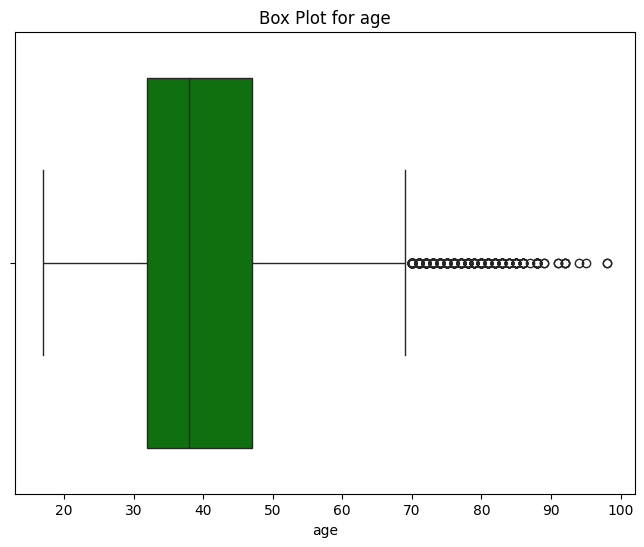

In [21]:
#Box plot of age

plt.figure(figsize=(8, 6))
sns.boxplot(x=bankdata['age'], color='green')
plt.title(f'Box Plot for age')
plt.xlabel('age')
plt.show()

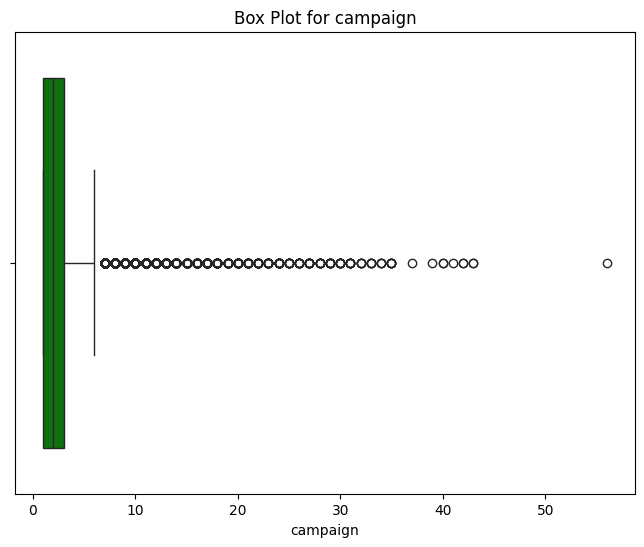

In [22]:
# Box plot of Campaign

plt.figure(figsize=(8, 6))
sns.boxplot(x=bankdata['campaign'], color='green')
plt.title(f'Box Plot for campaign')
plt.xlabel('campaign')
plt.show()

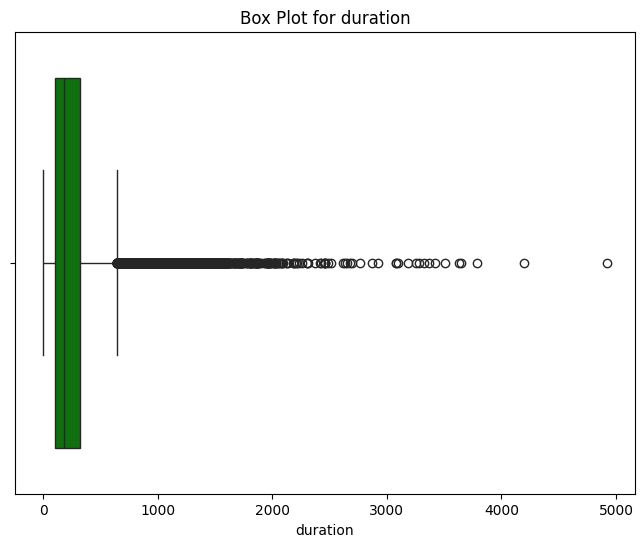

In [23]:
# Boxplot of duration

plt.figure(figsize=(8, 6))
sns.boxplot(x=bankdata['duration'], color='green')
plt.title(f'Box Plot for duration')
plt.xlabel('duration')
plt.show()

In [24]:
# Remove outliers from these features

# Removing outliers from 'age'
lower_bound_age = 15
upper_bound_age = 70
bankdata = bankdata[(bankdata['age'] >= lower_bound_age) & (bankdata['age'] <= upper_bound_age)]

# Removing outliers from 'campaign'
lower_bound_campaign = 1
upper_bound_campaign = 10
bankdata = bankdata[(bankdata['campaign'] >= lower_bound_campaign) & (bankdata['campaign'] <= upper_bound_campaign)]

# Removing outliers from 'duration'
lower_bound_duration = 0
upper_bound_duration = 1000
bankdata = bankdata[(bankdata['duration'] >= lower_bound_duration) & (bankdata['duration'] <= upper_bound_duration)]


In [25]:
bankdata.shape

(38956, 17)

## **Encoding Categorical variables**

In [26]:
bankdata.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'month', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'term_deposit_subscription'],
      dtype='object')

In [27]:
# Value counts for variables with "unknown" values (including NaN)
for column in ['job', 'marital', 'education', 'housing', 'poutcome']:
    print(f"Value counts for {column} (including NaN):\n{bankdata[column].value_counts(dropna=False)}\n")


Value counts for job (including NaN):
job
admin.           9927
blue-collar      8828
technician       6466
services         3804
management       2802
entrepreneur     1386
self-employed    1350
retired          1273
housemaid         991
unemployed        971
student           849
unknown           309
Name: count, dtype: int64

Value counts for marital (including NaN):
marital
married     23544
single      11033
divorced     4305
unknown        74
Name: count, dtype: int64

Value counts for education (including NaN):
education
university.degree      11577
high.school             9052
basic.9y                5763
professional.course     4992
basic.4y                3779
basic.6y                2174
unknown                 1603
illiterate                16
Name: count, dtype: int64

Value counts for housing (including NaN):
housing
yes        20445
no         17573
unknown      938
Name: count, dtype: int64

Value counts for poutcome (including NaN):
poutcome
nonexistent    33621
fail

In [28]:
#Cyclic Encoding

import math

# Mapping month and day features to numerical values
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
day_mapping = {
    'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4,
    'fri': 5, 'sat': 6, 'sun': 7
}

bankdata['month'] = bankdata['month'].map(month_mapping)
bankdata['day_of_week'] = bankdata['day_of_week'].map(day_mapping)

# Cyclic encoding for 'month'
bankdata['month_sin'] = np.sin(2 * np.pi * bankdata['month'] / 12)
bankdata['month_cos'] = np.cos(2 * np.pi * bankdata['month'] / 12)

# Cyclic encoding for 'day_of_week'
bankdata['day_sin'] = np.sin(2 * np.pi * bankdata['day_of_week'] / 7)
bankdata['day_cos'] = np.cos(2 * np.pi * bankdata['day_of_week'] / 7)

# Drop original 'month' and 'day_of_week' columns
bankdata = bankdata.drop(['month', 'day_of_week'], axis=1)

In [29]:
# One Hot Encoding
bankdata= pd.get_dummies(bankdata, columns=['job', 'marital', 'poutcome','housing'], dummy_na=True)

In [30]:
numeric_columns = bankdata.select_dtypes(include=['bool']).columns

# Convert only these numeric columns to Int64
bankdata[numeric_columns] = bankdata[numeric_columns].astype('Int64')

In [31]:
# Ordinal encoding for 'education'
education_mapping = {
    'illiterate': 0,
    'basic.4y': 1,
    'basic.6y': 2,
    'basic.9y': 3,
    'high.school': 4,
    'professional.course': 5,
    'university.degree': 6,
    np.nan: np.nan  # Keep NaN values as they are
}
bankdata['education'] = bankdata['education'].map(education_mapping)

In [32]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38956 entries, 0 to 41186
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        38956 non-null  int64  
 1   education                  37353 non-null  float64
 2   duration                   38956 non-null  int64  
 3   campaign                   38956 non-null  int64  
 4   pdays                      38956 non-null  int64  
 5   previous                   38956 non-null  int64  
 6   cons_price_idx             38956 non-null  float64
 7   cons_conf_idx              38956 non-null  float64
 8   euribor3m                  38956 non-null  float64
 9   nr_employed                38956 non-null  float64
 10  term_deposit_subscription  38956 non-null  int64  
 11  month_sin                  38956 non-null  float64
 12  month_cos                  38956 non-null  float64
 13  day_sin                    38956 non-null  float64


In [33]:
bankdata.head(3).T

,0,1,2
age,56,57,37
education,1.0,4.0,4.0
duration,261,149,226
campaign,1,1,1
pdays,999,999,999
previous,0,0,0
cons_price_idx,93.994,93.994,93.994
cons_conf_idx,-36.4,-36.4,-36.4
euribor3m,4.857,4.857,4.857
nr_employed,5191.0,5191.0,5191.0


# **Final Machine Learning Model**

In [34]:
#'term_deposit_subscription' is the target variable
X = bankdata.drop('term_deposit_subscription', axis=1)
y = bankdata['term_deposit_subscription']

In [35]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Tried multiple Multiple machine learning algorithms and for this problem XGBOOST classification gives best model.**

In [36]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'objective': ['binary:logistic', 'binary:hinge'],  # Add different loss functions
    'eval_metric': ['auc', 'logloss']  # Add different evaluation metrics
}

# Create the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Instantiate StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=cv,
                           scoring='roc_auc', n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
best_xgb = xgb.XGBClassifier(**best_params, random_state=42)
best_xgb.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'eval_metric': 'auc', 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'objective': 'binary:logistic'}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [37]:
# Predict probabilities for the training set
y_train_pred_proba = best_xgb.predict_proba(X_train)[:, 1]

# Calculate the ROC AUC score for the training set
roc_auc_train = roc_auc_score(y_train, y_train_pred_proba)
print(f"ROC AUC Score (Training): {roc_auc_train:.4f}")

ROC AUC Score (Training): 0.9713


ROC AUC Score: 0.9490


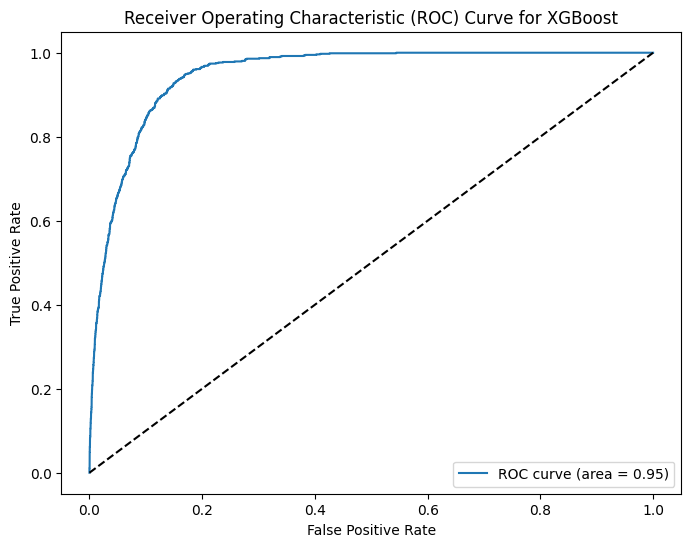

In [38]:
from sklearn.metrics import roc_curve
# Predict probabilities for the test set
y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost')
plt.legend(loc='lower right')
plt.show()


To improve model performance:

In [39]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 7, 15],  # Increased max_depth options
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],  # Added subsample for potential overfitting reduction
    'colsample_bytree': [0.8, 1.0],  # Added colsample_bytree for feature sampling
    'gamma': [0, 0.1, 0.5]  # Added gamma for regularization
}

# Create the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Instantiate StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=cv,
                           scoring='roc_auc', n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
best_xgb = xgb.XGBClassifier(**best_params, random_state=42)
best_xgb.fit(X_train, y_train)

# Predict probabilities for the training set
y_train_pred_proba = best_xgb.predict_proba(X_train)[:, 1]

# Calculate the ROC AUC score for the training set
roc_auc_train = roc_auc_score(y_train, y_train_pred_proba)
print(f"ROC AUC Score (Training): {roc_auc_train:.4f}")

# Predict probabilities for the test set
y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
ROC AUC Score (Training): 0.9662
ROC AUC Score: 0.9495


### **Gains Table**

In [40]:
# Predict probabilities for the training set
y_train_pred_proba = best_xgb.predict_proba(X_train)[:, 1]

# Create a DataFrame with actual and predicted probabilities
train_result = pd.DataFrame({'actual': y_train, 'predicted_prob': y_train_pred_proba})

# Sort the DataFrame by predicted probabilities in descending order
train_result = train_result.sort_values(by='predicted_prob', ascending=False)

# Calculate cumulative gains and assign deciles in descending order
train_result['decile'] = pd.qcut(train_result['predicted_prob'], 10, labels=False) + 1
train_result['decile'] = train_result['decile'].max() + 1 - train_result['decile']

# Group by decile and calculate the required metrics
gains_table_train = train_result.groupby('decile')['actual'].agg(['sum', 'count'])
gains_table_train['Resp_sum'] = gains_table_train['sum']
gains_table_train['Non_Resp_sum'] = gains_table_train['count'] - gains_table_train['sum']
gains_table_train['cum_resp_sum'] = gains_table_train['sum'].cumsum()
gains_table_train['cum_non_resp_sum'] = gains_table_train['count'].cumsum() - gains_table_train['sum'].cumsum()

# Calculate KS and Lift
total_responders = gains_table_train['sum'].sum()
total_records = gains_table_train['count'].sum()
baseline_response_rate = total_responders / total_records

gains_table_train['KS'] = (gains_table_train['cum_resp_sum'] / total_responders) - (gains_table_train['cum_non_resp_sum'] / total_records)
gains_table_train['Lift'] = (gains_table_train['Resp_sum'] / gains_table_train['count']) / baseline_response_rate

# calculate Cumulative Lift
gains_table_train['cum_lift'] = (gains_table_train['cum_resp_sum'] / (gains_table_train['cum_resp_sum']+gains_table_train['cum_non_resp_sum'])) / baseline_response_rate

# Reorder columns
gains_table_train = gains_table_train[['count', 'Resp_sum', 'Non_Resp_sum', 'cum_resp_sum', 'cum_non_resp_sum', 'KS', 'Lift','cum_lift']]

# Rename columns
gains_table_train = gains_table_train.rename(columns={'count': 'Count'})

print("Gains Table for Training Set:")
print(gains_table_train.round(2))

Gains Table for Training Set:
        Count  Resp_sum  Non_Resp_sum  cum_resp_sum  cum_non_resp_sum    KS  \
decile                                                                        
1        3117      2150           967          2150               967  0.67   
2        3116       746          2370          2896              3337  0.83   
3        3116       158          2958          3054              6295  0.79   
4        3117        24          3093          3078              9388  0.70   
5        3116         4          3112          3082             12500  0.60   
6        3116         3          3113          3085             15613  0.50   
7        3117         1          3116          3086             18729  0.40   
8        3116         0          3116          3086             21845  0.30   
9        3116         0          3116          3086             24961  0.20   
10       3117         0          3117          3086             28078  0.10   

        Lift  cum_lif

In [41]:
# Predict probabilities for the test set
y_test_pred_proba = best_xgb.predict_proba(X_test)[:, 1]

# Create a DataFrame with actual and predicted probabilities
test_result = pd.DataFrame({'actual': y_test, 'predicted_prob': y_test_pred_proba})

# Sort the DataFrame by predicted probabilities in descending order
test_result = test_result.sort_values(by='predicted_prob', ascending=False)

# Calculate cumulative gains and assign deciles in descending order
test_result['decile'] = pd.qcut(test_result['predicted_prob'], 10, labels=False) + 1
test_result['decile'] = test_result['decile'].max() + 1 - test_result['decile']

# Group by decile and calculate the required metrics
gains_table_test = test_result.groupby('decile')['actual'].agg(['sum', 'count'])
gains_table_test['Resp_sum'] = gains_table_test['sum']
gains_table_test['Non_Resp_sum'] = gains_table_test['count'] - gains_table_test['sum']
gains_table_test['cum_resp_sum'] = gains_table_test['sum'].cumsum()
gains_table_test['cum_non_resp_sum'] = gains_table_test['count'].cumsum() - gains_table_test['sum'].cumsum()

# Calculate KS and Lift
total_responders = gains_table_test['sum'].sum()
total_records = gains_table_test['count'].sum()
baseline_response_rate = total_responders / total_records

gains_table_test['KS'] = (gains_table_test['cum_resp_sum'] / total_responders) - (gains_table_test['cum_non_resp_sum'] / total_records)
gains_table_test['Lift'] = (gains_table_test['Resp_sum'] / gains_table_test['count']) / baseline_response_rate


#  calculate Cumulative Lift
gains_table_test['cum_lift'] = (gains_table_test['cum_resp_sum'] / (gains_table_test['cum_resp_sum']+gains_table_test['cum_non_resp_sum'])) / baseline_response_rate


# Reorder columns
gains_table_test = gains_table_test[['count', 'Resp_sum', 'Non_Resp_sum', 'cum_resp_sum', 'cum_non_resp_sum', 'KS', 'Lift','cum_lift']]

# Rename columns
gains_table_test = gains_table_test.rename(columns={'count': 'Count'})

print("Gains Table for Test Set:")
print(gains_table_test.round(2))


Gains Table for Test Set:
        Count  Resp_sum  Non_Resp_sum  cum_resp_sum  cum_non_resp_sum    KS  \
decile                                                                        
1         780       477           303           477               303  0.58   
2         779       212           567           689               870  0.78   
3         779        59           720           748              1590  0.77   
4         779        17           762           765              2352  0.69   
5         779         3           776           768              3128  0.59   
6         779         3           776           771              3904  0.50   
7         779         0           779           771              4683  0.40   
8         779         0           779           771              5462  0.30   
9         779         0           779           771              6241  0.20   
10        780         0           780           771              7021  0.10   

        Lift  cum_lift  


In [42]:
# KS Statistic
from scipy.stats import ks_2samp
ks_statistic, p_value = ks_2samp(y_test_pred_proba[y_test == 1], y_test_pred_proba[y_test == 0])
print(f"KS Statistic: {ks_statistic:.4f}")


KS Statistic: 0.7807


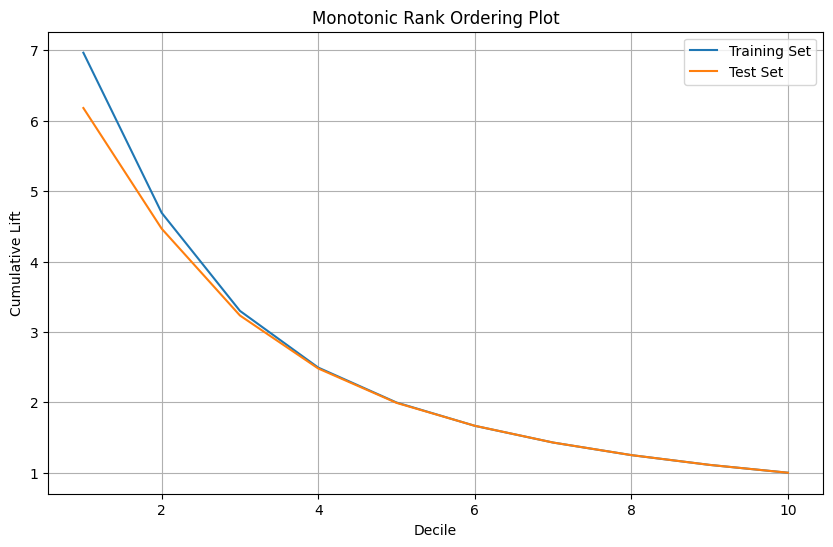

In [43]:
# Plot cumulative lift for training and test sets
plt.figure(figsize=(10, 6))
plt.plot(gains_table_train.index, gains_table_train['cum_lift'], label='Training Set')
plt.plot(gains_table_test.index, gains_table_test['cum_lift'], label='Test Set')
plt.xlabel('Decile')
plt.ylabel('Cumulative Lift')
plt.title('Monotonic Rank Ordering Plot')
plt.legend()
plt.grid(True)
plt.show()


The model demonstrates strong predictive performance with a high ROC AUC score of 0.9495 on the test set, indicating its ability to distinguish between positive and negative cases effectively.<br>
A KS Statistic of 0.7807 further supports this, suggesting a good separation of predicted probabilities between the two classes.<br>

The cumulative lift chart shows how much better our model is at identifying customers who will subscribe to the term deposit compared to random selection. In this case, the chart shows that the model has a significant lift in the top deciles. This means that the model is effectively identifying customers with a higher likelihood of subscribing. The difference in cumulative lift between training and testing is not very large, suggesting that the model generalizes reasonably well to unseen data. The KS statistic is a measure of how well the model separates the two groups (those who subscribed and those who did not). A higher KS statistic indicates better separation. In this case, the KS statistic is 0.7807, which suggests good separation. Overall, the model performance is good according to the cumulative lift chart and the KS statistic.
<br>

The Monotonic Rank Ordering Plot helps visualize the model's ability to rank observations based on their predicted probabilities.The plot shows how the cumulative lift changes across deciles. A steeper curve indicates better model performance in identifying the most likely responders.If the curves for the training and test sets are similar, it suggests that the model is stable and generalizes well to new data.<br>

While a slight difference exists between training (0.9662 ROC AUC) and testing performance, it's not significant enough to raise major concerns about overfitting. The model appears to generalize well to unseen data.
